In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
from skimage import data, color
import os
from skimage.transform import rescale, resize, downscale_local_mean


images = []
root = "/content/drive/MyDrive/roofFeature/test_1/"
files = os.listdir(root)

for filename in files:
    images.append(cv2.imread(f"{root}{filename}", cv2.IMREAD_GRAYSCALE))
    # cv2_imshow(images[-1])
print(f"number of images: {len(files)}")    

# Resize images and show them side by side

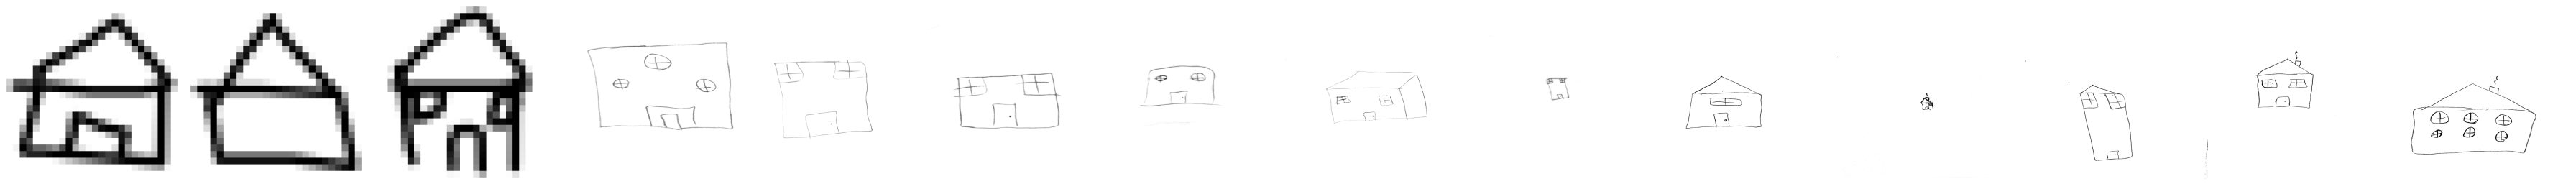

In [3]:
resized_imgs = []
for i in images:
  resized = cv2.resize(i, (256,256), interpolation = cv2.INTER_AREA)  
  resized_imgs.append(resized)

cv2_imshow(np.hstack(resized_imgs))

# Function that creates a square cross matrix or kernel for dilation and erosion

In [4]:
def square_cross_kernel(size: int) -> np.ndarray:
    """Creates a square cross kernel
    with a given size.

    ex. For size 3
        [0, 1, 0]
        [1, 1, 1]
        [0, 1, 0]

    Args:
        size (int): Size of square matrix

    Raises:
        ValueError: Raises value error when given an even size.

    Returns:
        np.ndarray: Kernel array
    """
    if size % 2 == 0:
        raise ValueError("Kernel size should be an odd number.")

    kernel = np.zeros(shape=(size, size), dtype=np.uint8)

    mid_idx = int(np.floor(size/2))
    kernel[mid_idx, :] = 1
    kernel[:, mid_idx] = 1
    return kernel  

# Lambda function for erosion and dialation

In [5]:
erode = lambda img_x, k_y : cv2.morphologyEx(img_x, op=cv2.MORPH_ERODE, kernel=k_y)
dilate = lambda img_x, k_y : cv2.morphologyEx(img_x, op=cv2.MORPH_DILATE, kernel=k_y)

# Helper method <b>apply_thresholding()</b> to apply binary thersholding onto array of images

In [6]:
def apply_thresholding(resized_imgs):
  threshed = []

  for i in resized_imgs:
    _, thresh = cv2.threshold(i, 240, 255, cv2.THRESH_BINARY) # applies binary thresholding
    threshed.append(thresh)
  
  return threshed # returns the thresholded images

# Test apply_thresholding() result and show them side by side

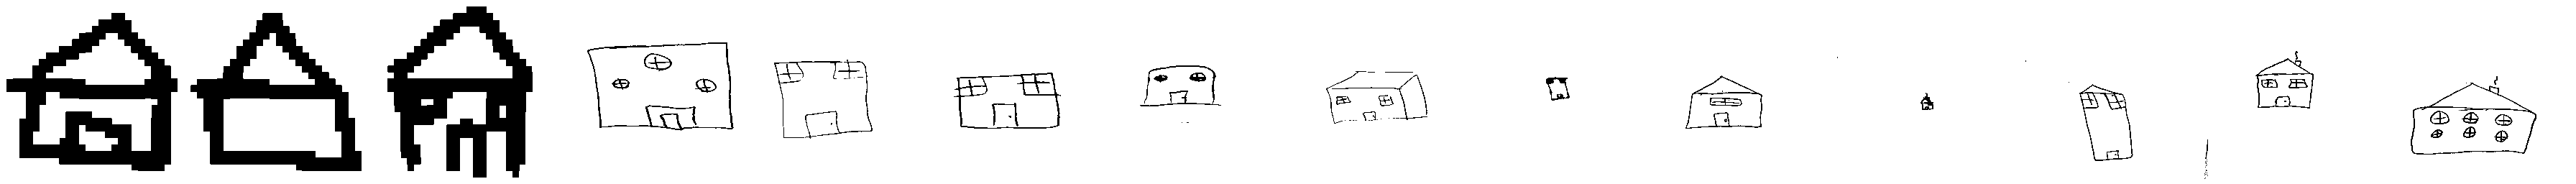

In [7]:
result = apply_thresholding(resized_imgs)

cv2_imshow(np.hstack(result))

In [21]:
def roof_or_noRoof(resized_imgs, index: int, size_of_house):

  img_gray = resized_imgs[index].copy()
  kernel = square_cross_kernel(3)
  for i in range(5):
    img_gray = erode(img_gray, kernel)

  # apply gaussian filter with kernel size 13x13 
  # then apply edge detection
  edges = cv2.Canny(image=img_gray, threshold1=50, threshold2=220)

  # apply dilation two times on the extracted edges using kernel 3x3  
  for i in range(2):
    edges = dilate(edges, kernel)

  # find contours
  contours, hierarchy = cv2.findContours(edges.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)
  approx_list = []
  
  for i in contours:
    peri = cv2.arcLength(i, True)
    approx = cv2.approxPolyDP(i, 0.05 *peri, True)
    approx_list.append(approx)
  
  classification = []
  for i, cnts in enumerate(approx_list):
    
  # cv2.boundingRect(cnts) finds the boundaries of a contour as a rectangle
  # i wanted to narrow down the unnecessary small contours that it detects 
      [x,y,w,h] = cv2.boundingRect(cnts)
      size = w*h/256 # normalize size
      if size_of_house == "small":
        if (size > 2):
          if (len(cnts) >= 5):  
            print("contour:", i, "Corners:", len(cnts))
            classification.append(1)
            im3=resized_imgs[index][y:y+h,x:x+w]
            cv2_imshow(im3)

          elif len(cnts) >= 4 and len(cnts) < 5: 
            print("contour:", i, "Corners:", len(cnts))
            im3=resized_imgs[index][y:y+h,x:x+w]
            classification.append(2)
            cv2_imshow(im3)

      if (size > 20):
        if (len(cnts) >= 5):
          classification.append(1)
          im3=resized_imgs[index][y:y+h,x:x+w]
          cv2_imshow(im3)

        elif len(cnts) >= 4 and len(cnts) < 5: 
          im3=resized_imgs[index][y:y+h,x:x+w]
          classification.append(2)
          cv2_imshow(im3)
  print(classification)

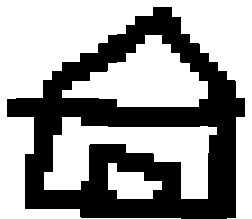

[1]


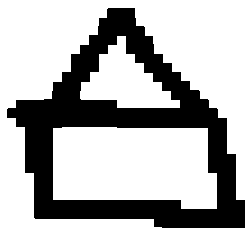

[2]


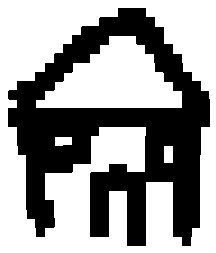

[1]


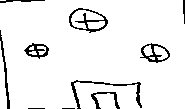

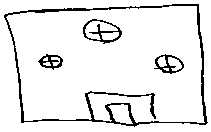

[2, 1]


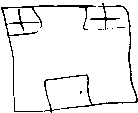

[2]


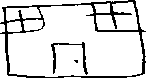

[2]


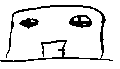

[2]


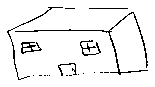

[2]
[]


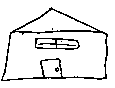

[1]
[]


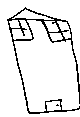

[1]


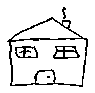

[1]


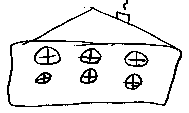

[1]


In [19]:
prnt = [roof_or_noRoof(resized_imgs=result, index=i, size_of_house="") for i in range(len(result))]

contour: 0 Corners: 4


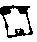

[2]


In [22]:
roof_or_noRoof(resized_imgs=result, index=8, size_of_house="small")

In [23]:
roof_or_noRoof(resized_imgs=result, index=10, size_of_house="small")

contour: 0 Corners: 5


[1]
